# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
! git clone https://github.com/DS3001/visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load the college_completion.csv data with Pandas
data = pd.read_csv('./visualization/assignment/data/college_completion.csv')

# 2) What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
data.shape # There are 3798 observations, with 63 variables.
data.head()

# 3) Cross tabulate control and level. Describe the patterns you see.
pd.crosstab(data['control'],data['level'])

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (7/7), done.


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


> Private, not-for-profit, 4-year colleges are the most frequent (1180 occurrences), followed closely by Public 2-year colleges (926). The least frequent type, by far, are Private not-for-profit 2-year colleges (only 68 occurrences).

<Axes: xlabel='grad_100_value', ylabel='Count'>

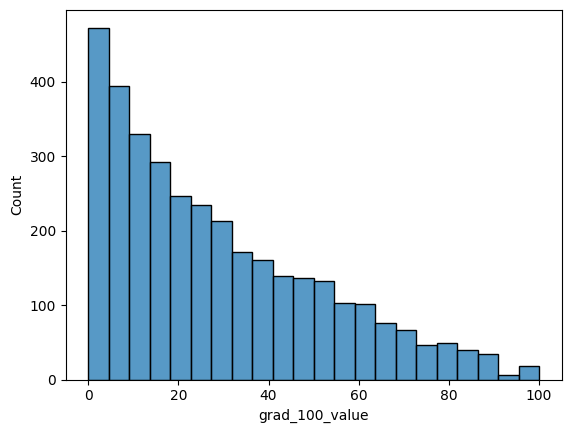

In [3]:
# 4) For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.
sns.histplot(data['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

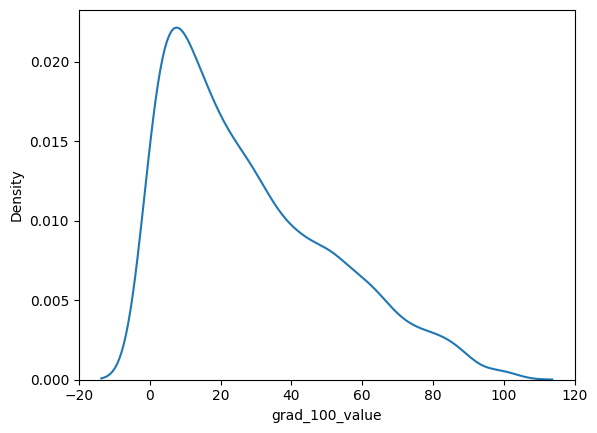

In [4]:
sns.kdeplot(data['grad_100_value'])

<Axes: ylabel='grad_100_value'>

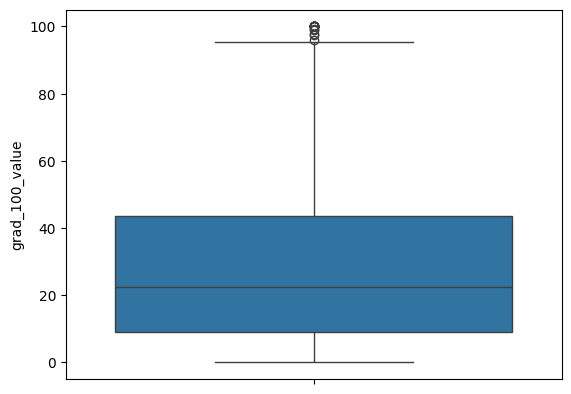

In [5]:
sns.boxplot(data['grad_100_value'])

In [6]:
data['grad_100_percentile'].describe()

count    3467.000000
mean       46.728295
std        30.541469
min         0.000000
25%        20.000000
50%        46.000000
75%        73.000000
max       100.000000
Name: grad_100_percentile, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

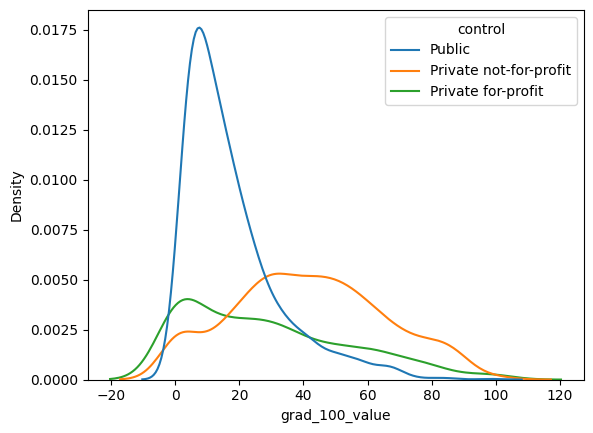

In [7]:
# 5) or grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see.
sns.kdeplot(data=data,x='grad_100_value',hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

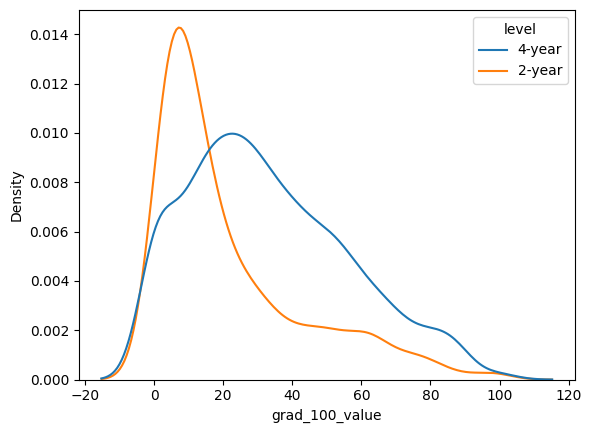

In [8]:
sns.kdeplot(data=data,x='grad_100_value',hue='level')

In [9]:
# Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
# Which institutions appear to have the best graduation rates?
data.groupby(['level'])['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1455.0,21.636151,21.645747,0.0,6.0,13.0,30.600,100.0
4-year,2012.0,33.230119,23.270160,0.0,15.2,29.7,49.225,100.0


In [10]:
data.groupby(['control'])['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


> 4-year colleges have much higher graduation rates than 2-year colleges (around a 10% difference), and Private not-for-profit colleges have much higher graduattion rates than Public or Private for-profit colleges (around 12-15% difference).

<Axes: xlabel='grad_100_value', ylabel='Density'>

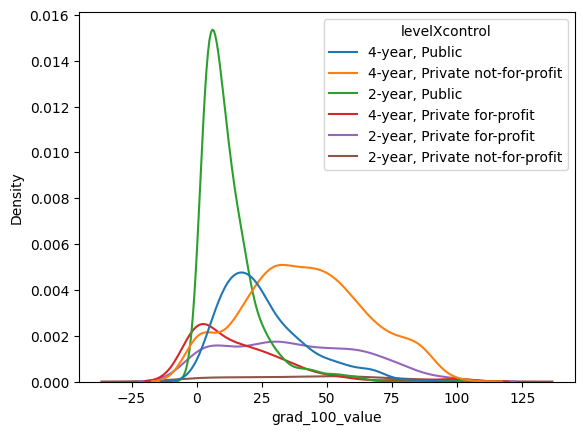

In [11]:
# 6) Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot.
# Which institutions appear to have the best graduation rates?
data['levelXcontrol'] = data['level'] + ', ' + data['control']
sns.kdeplot(data=data,x='grad_100_value',hue='levelXcontrol')

> The graduation rate for 2-year public colleges has a sharp peak in density around the 25 percentile value, more than double the peak of any other college type. 4-year private not-for-profit colleges have the highest uniform distribution of percentile density, with a relative peak around 25-50% range.

> 4-year public colleges have a relative peak around the 23% range, though it is much less drastic than the 2-year public college density at that same percentile range.

<Axes: xlabel='aid_value', ylabel='Density'>

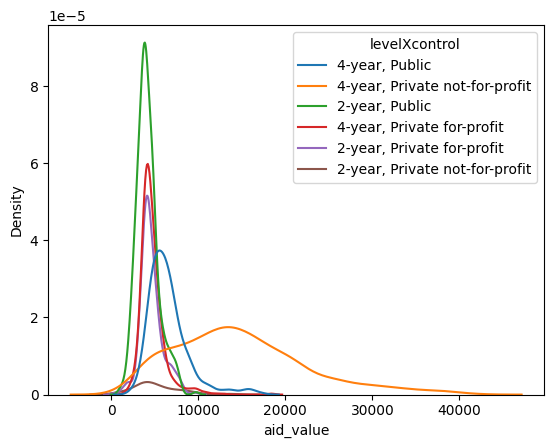

In [12]:
# 7) Make a kernel density plot of aid_value. Now group your graph by level and control.
# What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
sns.kdeplot(data=data, x='aid_value', hue='levelXcontrol')

In [13]:
data.groupby(['level'])['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
2-year,1458.0,4310.878601,1384.045631,294.0,3485.5,4113.0,4890.0,13654.0
4-year,2339.0,10235.379222,7227.369167,902.0,4830.5,7222.0,14046.0,41580.0


In [14]:
data.groupby(['control'])['aid_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,991.0,4632.206862,1399.121259,294.0,3861.50,4331.0,5131.5,18355.0
Private not-for-profit,1248.0,14180.722756,7772.700998,902.0,8325.00,13322.0,18571.0,41580.0
Public,1558.0,5094.835687,2136.436370,881.0,3725.25,4667.0,6087.5,17299.0


>

> 4-year colleges give much more aid than 2-year colleges, giving an average of almost 6 thousand dollars more.

> Private For-profit and Public colleges give roughly the same average aid (around $5k), but Private not-for-profit colleges give almost 3 times that amount (around $14k).

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

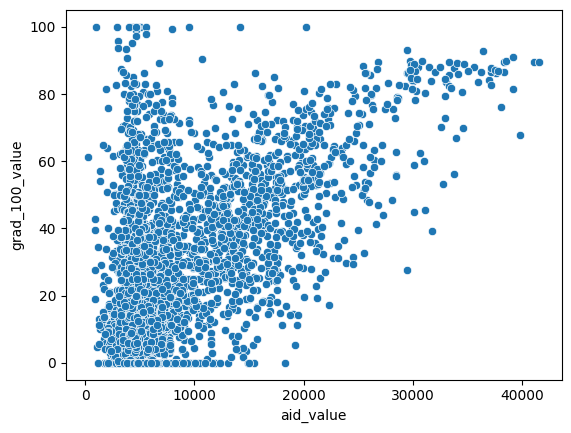

In [15]:
# 8) Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control.
# Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
sns.scatterplot(data=data, x='aid_value', y='grad_100_value')


> The scatterplot depicts a relative positive correlation between the percentage of graduation and the amount of aid given.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

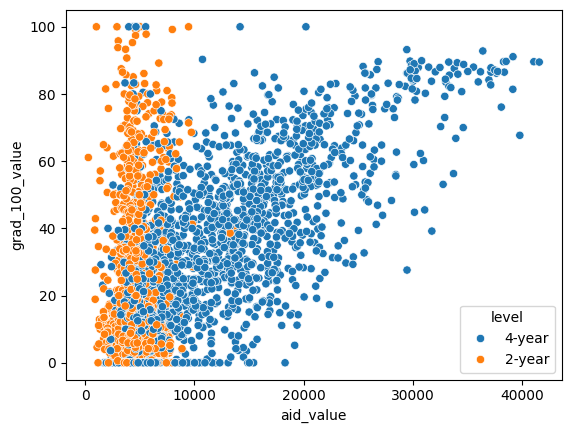

In [16]:
sns.scatterplot(data=data,x='aid_value',y='grad_100_value',hue='level')

> When differentiating the colleges between 2-year and 4-year programs, aid seems to increase graduation rates in 4-year colleges.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

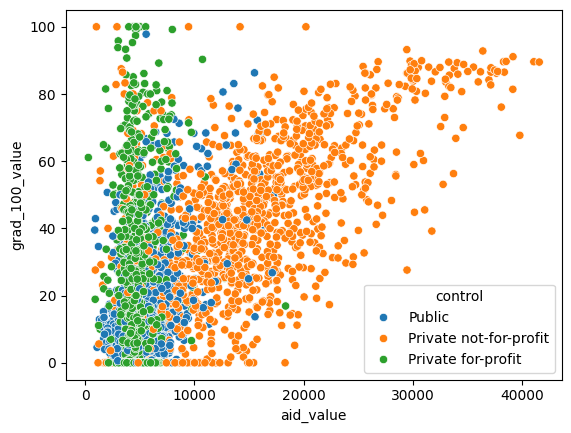

In [17]:
sns.scatterplot(data=data,x='aid_value',y='grad_100_value',hue='control')

> When differentiating between control, aid seems to increase in graduation rates for Private NFP colleges, due to the general postive linear correlation between the rate and aid.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [22]:
# 1) Picking a dataset -- COVID Nursing Data
data = pd.read_csv('./visualization/assignment/data/covid_nursing.csv', nrows=407162)
data.head()

<ipython-input-22-5ba187208629>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./visualization/assignment/data/covid_nursing.csv', nrows=407162)


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week who Received a Completed COVID-19 Vaccination at Any Time,Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Handling Missing Values

> Unfortunately, the data dictionary does not provide information as to how missing values are handled.

3. Variables to Clean

> I will be cleaning the "% of [Healthcare Personnel / Residents] who are up-to-date with COVID Vaccines" variables. I found these variables interesting as I am curious to know if healthcare workers, those who are at the frontline of the pandemic and the advocates for vaccination, have been vaccinated themselves.

In [24]:
# Replacing NaN values with 0
data = data.fillna(0)
data.head()


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week who Received a Completed COVID-19 Vaccination at Any Time,Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines'>

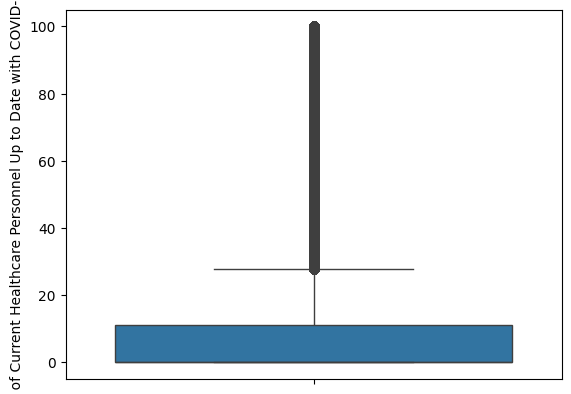

In [25]:
# 4) Boxplot for "% of Vaccinated Healthcare Personnel"
sns.boxplot(data['Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines'])

> Interestingly, the box only spans from the 0 to ~10% range, with lots of outliers from the +30% percentage range.

<Axes: ylabel='Percentage of Current Residents Up to Date with COVID-19 Vaccines'>

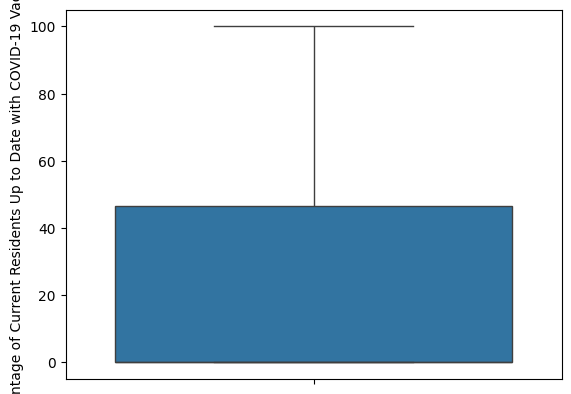

In [27]:
sns.boxplot(data['Percentage of Current Residents Up to Date with COVID-19 Vaccines'])

> There are no outliers with this variable. All the values for this variable fall within the interquartile range of 0 to ~50 percentage.

<Axes: xlabel='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines', ylabel='Count'>

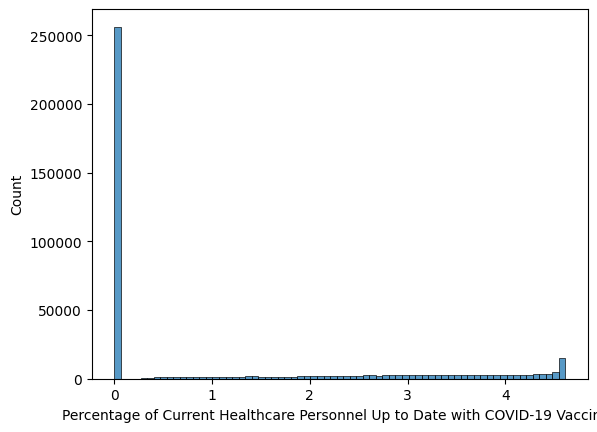

In [30]:
# 4) Histogram for "% of Vaccinated Healthcare Personnel".
# The logarithm of the data was taken for rescaling purposes.
log_data = np.log1p(data['Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines'])
sns.histplot(log_data)


> The histogram depicts a strong right-tailed distribution, even after a logarithmic transformation, with a very strong peak at "0". This could also be a result of the NaN values being replaced with 0 in the cleaning process from a prior step.  

<Axes: xlabel='Percentage of Current Residents Up to Date with COVID-19 Vaccines', ylabel='Count'>

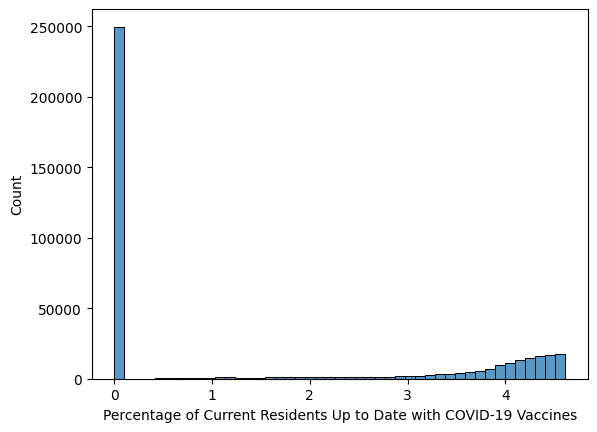

In [35]:
# 6) Histogram for "% of Vaccinated Residents".
# The logarithm of the data was taken for rescaling purposes.
log_data = np.log1p(data['Percentage of Current Residents Up to Date with COVID-19 Vaccines'])
sns.histplot(log_data)

> The histogram depicts a strong right-tailed distribution, even after a logarithmic transformation, with a very strong peak at "0". This could also be a result of the NaN values being replaced with 0 in the cleaning process from a prior step. However, there is a slight increase in percentage on the right-side of the histogram distribution.

<Axes: xlabel='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines', ylabel='Percentage of Current Residents Up to Date with COVID-19 Vaccines'>

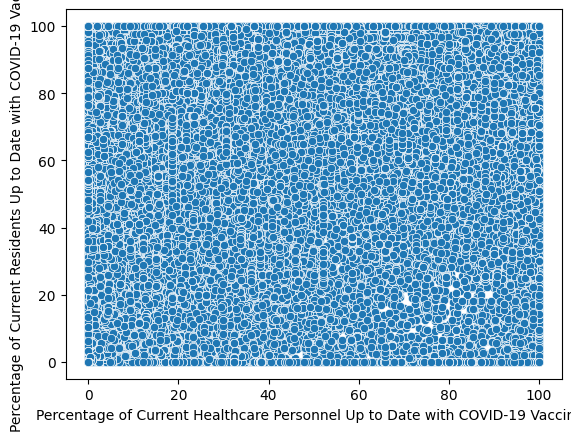

In [39]:
# 7) Scatter for % of Vaccinated Residents versus % of Vaccinated Healthcare Personnel.
sns.scatterplot(data=data, x='Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines', y='Percentage of Current Residents Up to Date with COVID-19 Vaccines')

> The scatterplot decpicts no correlation between the percentage of Residents who are up-to-date with vaccinations versus Health Care Personnel who are up-to-date with vaccinations.

In [42]:
# 8) Cross Tabulated Table
cross_tab = pd.crosstab(data['Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines'], data['Percentage of Current Residents Up to Date with COVID-19 Vaccines'])
cross_tab.describe()

Percentage of Current Residents Up to Date with COVID-19 Vaccines,0.000,0.205,0.285,0.291,0.294,0.313,0.321,0.326,0.331,0.332,...,99.435,99.438,99.448,99.451,99.454,99.457,99.459,99.462,99.588,100.000
count,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,...,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000,17573.000000
mean,14.207534,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,0.000057,...,0.000057,0.000057,0.000114,0.000228,0.000057,0.000057,0.000057,0.000057,0.000057,0.162693
std,1819.169850,0.007544,0.007544,0.007544,0.007544,0.007544,0.007544,0.007544,0.007544,0.007544,...,0.007544,0.007544,0.015087,0.030174,0.007544,0.007544,0.007544,0.007544,0.007544,6.118238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,241155.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,777.000000


> When cross tabulating and finding the description of the dataset, it is clear that "0%" is the most common occurrence in the dataset. This, however, could be due to the data cleaning step as described earlir. When disregarding the "0%" category, it looks like an average of 99.451% of residents and health care personnel are fully up-do-date with COVID-19 vaccinations.
